In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
raw_data = pd.read_csv("ADNI_dataset.csv")
raw_data = raw_data[raw_data["CDR"] != "None"]
roi_data = pd.concat([raw_data["CDR"], raw_data.loc[:, 'BrainSeg':]], axis=1).astype(float)
roi_data = roi_data[roi_data["CDR"] >= 0]

In [15]:
rates_column = "Hippocampus"
rates = pd.concat([roi_data["CDR"], 
                   roi_data["Left-" + rates_column] / roi_data["BrainSeg"],
                   roi_data["Right-" + rates_column] / roi_data["BrainSeg"],
                   (roi_data["Left-"  + rates_column] + roi_data["Right-"  + rates_column]) / roi_data["BrainSeg"],
                  ], axis=1, keys=["CDR", "Rate_left", "Rate_right", "Rate_whole"])
rates *= 1000
rates["CDR"] = rates["CDR"] / 1000
rates.describe()

,CDR,Rate_left,Rate_right,Rate_whole
count,1527.000000,1527.000000,1527.000000,1527.000000
mean,0.442043,2.941193,3.021285,5.962478
std,0.369744,0.468731,0.502031,0.936276
min,0.000000,1.797604,1.620051,3.719292
25%,0.000000,2.601493,2.668861,5.263896
50%,0.500000,2.913938,3.013519,5.903912
75%,0.500000,3.238053,3.363721,6.604420
max,3.000000,4.685100,4.755916,9.390933


In [16]:
NC = rates[rates["CDR"] == 0]
MCI = rates[rates["CDR"] == 0.5]
AD = rates[rates["CDR"] >= 1]

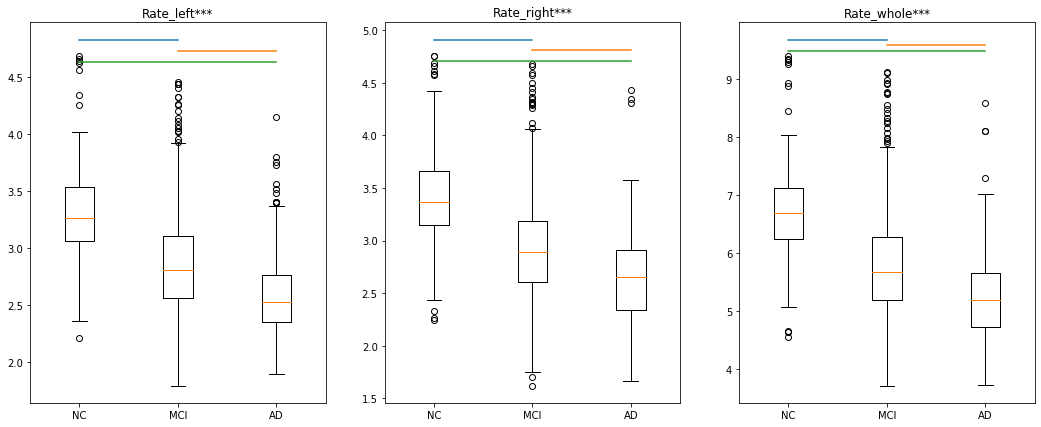

In [17]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

columns = ["Rate_left", "Rate_right", "Rate_whole"]
fig = plt.figure(figsize=(18, 7))
ax = {}

for index, column in enumerate(columns):
    ax[index] = fig.add_subplot(1, 3, index + 1)
    ax[index].boxplot([NC[column], MCI[column], AD[column]])
    ax[index].set_xticklabels(["NC", "MCI", "AD"])
    y_min, y_max = ax[index].get_ylim()
    
    _, p = f_oneway(NC[column], MCI[column], AD[column])
    p_NM = ttest_ind(NC[column], MCI[column]).pvalue
    p_MA = ttest_ind(MCI[column], AD[column]).pvalue
    p_NA = ttest_ind(NC[column], AD[column]).pvalue
    
    if (p < 0.05): column += '*'
    if (p < 0.005): column += '*'
    if (p < 0.001): column += '*'
    ax[index].set_title(column)
    
    if (p_NM < 0.05): ax[index].plot([1, 2], [y_max, y_max])
    if (p_MA < 0.05): ax[index].plot([2, 3], [y_max - 0.1, y_max - 0.1])
    if (p_NA < 0.05): ax[index].plot([1, 3], [y_max - 0.2, y_max - 0.2])


In [18]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

fl, pl = f_oneway(NC["Rate_left"], MCI["Rate_left"], AD["Rate_left"])
fr, pr = f_oneway(NC["Rate_right"], MCI["Rate_right"], AD["Rate_right"])
fw, pw = f_oneway(NC["Rate_whole"], MCI["Rate_whole"], AD["Rate_whole"])

tpl_NM = ttest_ind(NC["Rate_left"], MCI["Rate_left"]).pvalue
tpl_MA = ttest_ind(MCI["Rate_left"], AD["Rate_left"]).pvalue
tpl_NA = ttest_ind(NC["Rate_left"], AD["Rate_left"]).pvalue

tpr_NM = ttest_ind(NC["Rate_right"], MCI["Rate_right"]).pvalue
tpr_MA = ttest_ind(MCI["Rate_right"], AD["Rate_right"]).pvalue
tpr_NA = ttest_ind(NC["Rate_right"], AD["Rate_right"]).pvalue

tpw_NM = ttest_ind(NC["Rate_whole"], MCI["Rate_whole"]).pvalue
tpw_MA = ttest_ind(MCI["Rate_whole"], AD["Rate_whole"]).pvalue
tpw_NA = ttest_ind(NC["Rate_whole"], AD["Rate_whole"]).pvalue

print(pl, pr, pw)
print(tpl_NM, tpl_MA, tpl_NA)
print(tpr_NM, tpr_MA, tpr_NA)
print(tpw_NM, tpw_MA, tpw_NA)

1.7074956268178097e-107 1.2092135979723086e-92 2.297678284398488e-108
1.7277732949630484e-72 2.8233689707458396e-17 3.0703680191191474e-90
1.4028737764760388e-64 8.788661390796476e-14 2.5111587343552597e-76
5.014628092429612e-74 8.003092271140946e-17 1.1120803716429004e-89
